In [5]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from astropy import units as u
from astropy.coordinates import SkyCoord
gaia_table = Table.read('1570223363582O-result.csv',format='csv')
print(gaia_table.colnames)

['phot_g_mean_mag', 'ra', 'dec', 'parallax', 'parallax_error', 'radial_velocity', 'radial_velocity_error', 'phot_rp_mean_mag', 'phot_bp_mean_mag', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error']


In [6]:
radialv = gaia_table['radial_velocity'].data
gmags = gaia_table['phot_g_mean_mag']

In [7]:
#randomly selects 400 radial velocities from the array
averages = np.zeros(shape=(10000,1))
subsetmean = averages[0] #star sample compute the average, store this average
for x in range(10000):
    subsetrv = np.random.choice(radialv,400,replace=False)
    subsetmean = np.mean(subsetrv)
    averages[x] = subsetmean

In [8]:
def gaussian(x, a, b, x0):
    return(a * np.exp(-(x-x0)**2 /(2*(b**2))))

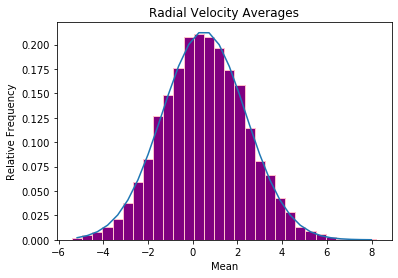

0.533401898253561


In [9]:
np.histogram(averages) #without the hole from Ross' data
bin_height, bin_edges = np.histogram(averages,density=True,bins=30)
xvals = 0.5 * (bin_edges[0:-1]+ bin_edges[1:])

popt, pcov = curve_fit(gaussian, xvals, bin_height)
sig = popt[1]
mean = popt[2]
norm = popt[0]
yfit = gaussian(xvals, *popt)

plt.hist(averages,density=True,bins=30,edgecolor='Pink',color='Purple')
plt.plot(xvals, yfit)
plt.title("Radial Velocity Averages")
plt.xlabel("Mean")
plt.ylabel("Relative Frequency")
plt.show()
print('Mean: ' + str(np.mean(averages)))

In [19]:
par1 = gaia_table['parallax']
bpmag1 = gaia_table['phot_bp_mean_mag']
rpmag1 = gaia_table['phot_rp_mean_mag']
base = 10
color1 = bpmag1-rpmag1
absmag1 = gmags+5*np.log10(gaia_table['parallax']/100)

In [20]:
# Create magnitude groupings
def section_maker(color, abs_mag):
    x_range = []
    for z in range(len(color)):
        if color[z]>2.3 and color[z]<2.5:
            if abs_mag[z] < 9:
                x_range.append(color[z])
    y_range = []
    for j in x_range:
        ind = x_range.index(j)
        y_range.append(abs_mag[ind])
        
    y_start = max(y_range)
    sections_y = []
    sections_x = []
        
    section_range = np.arange(3,y_start,1)
    for i in section_range:
        sections_y.append([])
        sections_x.append([])
    for j in range(len(sections_y)):
        sections_y[j].append(section_range[j])
        sections_y[j].append(section_range[j])
        sections_x[j].append(0)
        sections_x[j].append(3)
        
    sections = [sections_x, sections_y]
    return(sections)

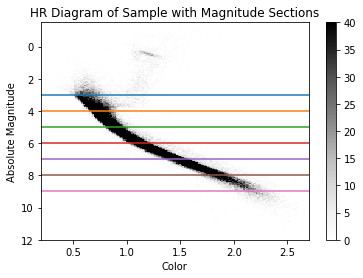

In [21]:
plt.figure()
plt.hist2d(color1,absmag1,cmap = 'Greys',bins=[200,200],vmin=0,vmax=40)
cbar = plt.colorbar()
plt.ylim(12,-1.5)
plt.xlim(0.2,2.7)
plt.xlabel('Color')
plt.title("HR Diagram of Sample with Magnitude Sections")
plt.ylabel('Absolute Magnitude')
for z in range(len(section_maker(color1, absmag1)[1])):
    plt.plot(section_maker(color1, absmag1)[0][z], section_maker(color1, absmag1)[1][z])
plt.savefig("fig5_GAIA.jpg")

In [22]:
# Sort stars into groupings 
def star_splitter(bpmags, rpmags, gmags):
    #Making sections
    color = (bpmags-rpmags)
    absmag = gmags+5*np.log10(gaia_table['parallax']/100)
    sections = []
    magrange = section_maker(color, absmag)[1]
    for j in magrange:
        sections.append(j[0])
    
    #Dividing stars into sections
    stargroups = []
    for i in range(len(sections)-1):
        stargroups.append([])
        

    for p in range(len(absmag)):
        if absmag[p] < sections[-1]:
            if absmag[p] > sections[0]:
                for z in range(len(sections)-1):
                    if absmag[p] > sections[z]:
                        if absmag[p] < sections[z+1]:
                            stargroups[z].append(p)
    means = []
    deviations = []
    magsections = []
    for x in range(len(sections)-1):
        magsections.append(str(sections[x]) + '-' +str(sections[x+1]))
    #Plotting histograms for each section and displaying standard deviation of sample
    for k in range(len(stargroups)):
        rv = []
        for b in stargroups[k]:
            rv.append(gaia_table['radial_velocity'][b])
        
        averages1 = np.zeros(shape=(10000,1))
        subsetmean1 = averages1[0] #star sample compute the average, store this average
        for x in range(10000):
            subsetradv = np.random.choice(rv,400,replace=False)
            subsetmean1 = np.mean(subsetradv)
            averages1[x] = subsetmean1
        np.histogram(averages1) #without the hole
        
        bin_height1, bin_edges1 = np.histogram(averages1,density=True,bins=30)
        xvals1 = 0.5 * (bin_edges1[0:-1]+ bin_edges1[1:])

        popt1, pcov1 = curve_fit(gaussian, xvals1, bin_height1)
        sig1 = popt1[1]
        mean1 = popt1[2]
        norm1 = popt1[0]
        yfit1 = gaussian(xvals1, *popt1)

        plt.hist(averages1,density=True,bins=30,edgecolor='Pink',color='Purple')
        plt.plot(xvals1, yfit1)
        plt.title("Radial Velocity Averages in the " + str(sections[k]) + '-' +str(sections[k+1]) +' Magnitude Range')
        plt.xlabel("Mean")
        plt.ylabel("Relative Frequency" )
        plt.show()
        deviations.append(sig1)
        means.append(np.mean(averages1))
        print("The standard deviation is: " +str(sig1))
        print('The mean is ' + str(np.mean(averages1)))       
    
    return deviations, means, magsections
    

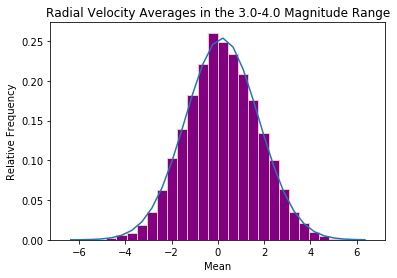

The standard deviation is: 1.5758209746315512
The mean is 0.20353245947502552


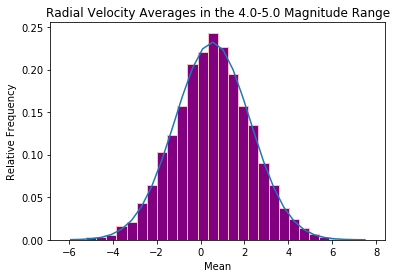

The standard deviation is: 1.7114910043789573
The mean is 0.5355319509858929


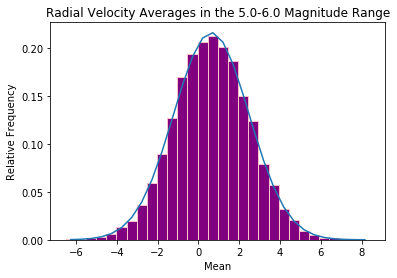

The standard deviation is: 1.849206625223492
The mean is 0.6406600079631818


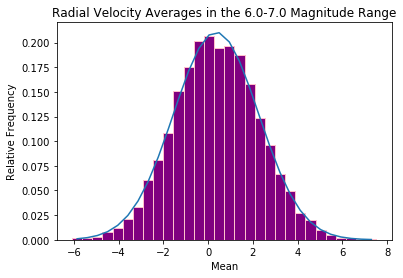

The standard deviation is: 1.903721637240161
The mean is 0.3731298624796548


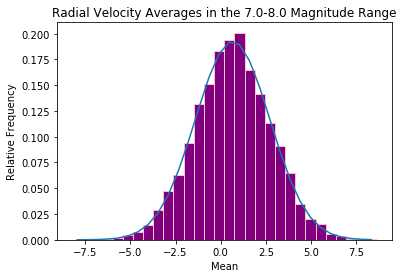

The standard deviation is: 2.0658587104271047
The mean is 0.6597478999030305


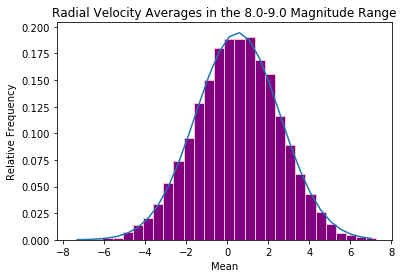

The standard deviation is: 2.0542195585958893
The mean is 0.468996214399372


In [33]:
devs, means, magnitude_sections = star_splitter(bpmag1, rpmag1, gmags)

<function matplotlib.pyplot.show(*args, **kw)>

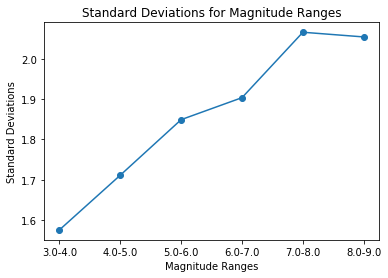

In [35]:
xmarks = np.arange(3.5,9.5,1)
plt.xticks(xmarks, magnitude_sections)
plt.plot(xmarks, devs, linestyle = '-', marker = 'o')
plt.title('Standard Deviations for Magnitude Ranges')
plt.ylabel('Standard Deviations')
plt.xlabel('Magnitude Ranges')
# plt.savefig("fig1_GAIA.jpg")
plt.show

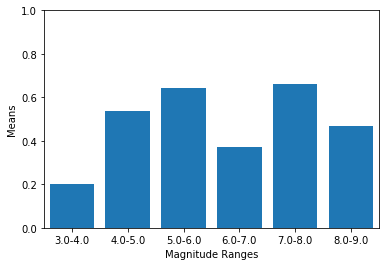

In [36]:
plt.xticks(xmarks, magnitude_sections)
plt.bar(xmarks, means)
plt.ylim(0,1)
plt.xlim(3,9)
plt.xlabel("Magnitude Ranges")
plt.ylabel("Means")
plt.show()